<a href="https://colab.research.google.com/github/AnIsAsPe/Named-Entity-Recognition-NER-con-LSTM-Bidireccionales/blob/main/Notebooks/Word_embeddings_Word2Vec_espa%C3%B1ol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 12.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
openc

In [1]:
import numpy as np
import pandas as pd
import gensim         # Procesamiento de lenguaje natural (NPL)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cargar vectores de palabras Word2Vec en español
Bajaremos los vectores word2vec en español entrenados [Spanish Billion Word Corpus and Embeddings](https://crscardellino.net/SBWCE/).

Cuenta con más de 1 millones vectores de 300 dimensiones

Los encajes fueron descargados originalmente de https://www.kaggle.com/datasets/rtatman/pretrained-word-vectors-for-spanish y está disponible en este [archivo en Drive](https://drive.google.com/drive/folders/1Wb8ntGkl7wW-Xw7CCV2OKof0joULt_Yc?usp=sharing)

In [3]:
file =  '/content/drive/MyDrive/Datos/Embeddings/Spanish1B_w2v/SBW-vectors-300-min5.bin'
w2v = gensim.models.KeyedVectors.load_word2vec_format(file,  binary=True)

In [4]:
vocabulario = w2v.index_to_key  #lista con todas las palabras

print('Tamaño del vocabulario', len(vocabulario))

Tamaño del vocabulario 1000653


In [5]:
# cada palabra, tiene asociado un vector de 300 dimensiones
print(type(w2v['curso']))
w2v['curso'].shape

<class 'numpy.ndarray'>


(300,)

numpy.memmap es un vector mapeado en memoria que se lee de un archivo binario en disco, sirve para acceder a pequeños segmenteos de grandes archivos en disco sin leer el archivo completo en la memoria

# Creación de diccionario de palabras y vectores

In [6]:
%%time
dic_word2vec  = {}
for palabra in w2v.index_to_key:
  dic_word2vec[palabra] = w2v[palabra]


CPU times: user 2.54 s, sys: 129 ms, total: 2.67 s
Wall time: 5.66 s


In [13]:
dic_word2vec['planta']

array([ 0.05494198, -0.18085724,  0.06706601, -0.19092476,  0.00650512,
        0.01937751,  0.11348494, -0.05449413,  0.08655539, -0.2886382 ,
        0.05845961, -0.16793603, -0.3850676 , -0.04051219,  0.03176188,
        0.40264615,  0.21040663,  0.0883575 , -0.25252166,  0.11677174,
       -0.09073283,  0.07381769, -0.27628678,  0.21091127,  0.14240877,
       -0.10981421, -0.34911114, -0.19339538,  0.22871357,  0.43385395,
        0.1584766 ,  0.34560347,  0.29937375,  0.26882872,  0.16644262,
        0.1586052 , -0.21881811, -0.09453507, -0.05469298,  0.41844323,
        0.3114989 ,  0.12946662, -0.16699608, -0.09269492,  0.17550081,
       -0.56177527,  0.05843798,  0.13243195,  0.06198465,  0.27373928,
        0.15052645, -0.07307847, -0.1770302 , -0.26355362,  0.04328647,
       -0.11498378, -0.46873236,  0.01320607,  0.5078361 ,  0.2587654 ,
       -0.02853593,  0.30465934,  0.04697463,  0.18311624, -0.10658363,
       -0.06179718, -0.14502083,  0.20774111, -0.00491219,  0.24

# Ejemplos de vectores de palabras

In [14]:
ejemplos = 'hombre mujer niño niña anciano anciana'.split()

#Construcción de un dataframe con los vectores de las palabras elegidas
vectores = {palabra: dic_word2vec[palabra] for palabra in ejemplos}
X = pd.DataFrame.from_dict(vectores, orient='index')

X

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
hombre,0.001210,-0.295635,0.164287,0.076383,0.130810,-0.189076,-0.195853,-0.188454,0.180234,-0.109916,...,-0.183059,0.003205,-0.065732,0.310238,0.009807,0.050416,0.137551,-0.291809,-0.178414,-0.028322
mujer,-0.001835,-0.241675,0.176787,0.117577,-0.027157,-0.290824,-0.140618,-0.211262,0.257194,-0.006783,...,-0.199095,-0.076073,-0.091490,0.409091,-0.138657,-0.120521,-0.049178,-0.102034,0.074344,0.012842
niño,-0.163768,-0.294062,0.122578,0.152002,0.149629,-0.065488,-0.050920,-0.409104,0.154769,-0.120814,...,0.057476,0.282848,-0.293337,0.058352,0.132345,0.146489,-0.073507,-0.340581,0.154004,0.130104
niña,-0.055173,-0.142419,0.215838,0.184544,-0.069941,-0.191414,-0.136663,-0.403305,0.235723,-0.059558,...,0.017596,-0.061825,-0.231494,0.271976,0.037338,0.194672,-0.150918,-0.047116,0.264059,0.169804
anciano,-0.324883,-0.179371,0.278430,0.183685,0.132469,-0.190020,-0.075106,-0.389574,0.379598,-0.214322,...,-0.044469,0.103505,-0.015144,0.057906,0.154480,0.013753,0.098335,-0.195538,-0.085552,0.111676
anciana,-0.237837,0.098547,0.068938,0.136460,-0.072329,-0.099849,0.001105,-0.195434,0.442508,-0.118795,...,-0.173420,-0.259782,-0.040729,0.368887,0.030587,-0.129665,-0.072156,-0.086298,0.279293,0.281335


<h2> Visualización de vectores

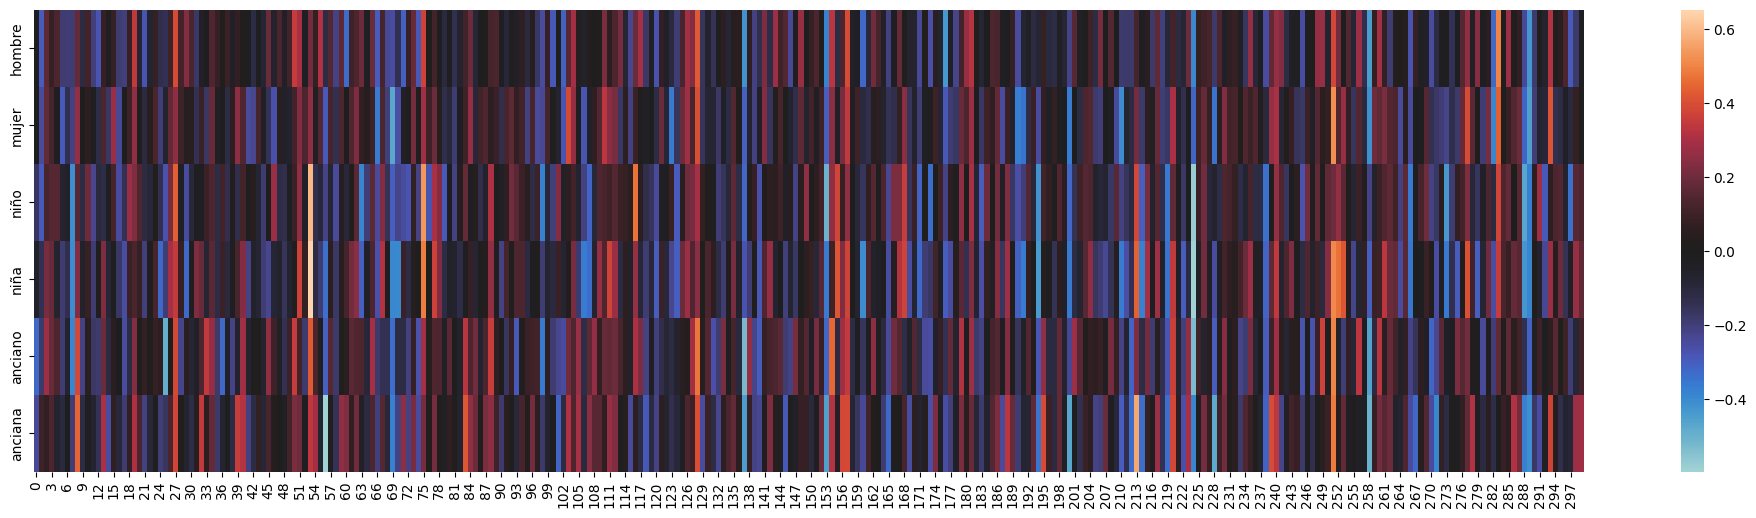

In [15]:
#Visualización de los vectores de las palabas elegidas
fig = plt.figure(figsize = (25, 6))
v_max = X.max().max()
v_min = X.min().min()
ax = sns.heatmap(X, vmin = v_min, vmax = v_max, center = 0)

<h2> Visualización de vectores en un espacio tridimensional

In [16]:
import plotly.express as px
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
components = pd.DataFrame(pca.fit_transform(X), index = X.index)
components.reset_index(inplace=True)


fig = px.scatter_3d( components, x=0, y=1, z=2, color='index',
                    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
fig.show()

# Similitud entre vectores
[similitud coseno](https://en.wikipedia.org/wiki/Cosine_similarity)

## Similitud entre dos palabras

In [7]:
def similitud_coseno(a_vector, b_vector):
    '''Calcula la similitud coseno entre los vectores a y b'''

    numerador = np.dot(a_vector, b_vector)

    a_norm = np.sqrt(np.sum(a_vector**2))
    b_norm = np.sqrt(np.sum(b_vector**2))

    denominador = a_norm * b_norm

    similitud_coseno = numerador / denominador

    return similitud_coseno

In [8]:
similitud_coseno(dic_word2vec['computadora'], dic_word2vec['calculadora'])

0.58049077

In [9]:
similitud_coseno(dic_word2vec['computadora'], dic_word2vec['laptop'])

0.6776528

In [28]:
# El modelo se entrenó de manera que distinguiera entre mayúsculas o minúsculas
similitud_coseno(dic_word2vec['rio'], dic_word2vec['Río'])

0.554841

## Similitud de una palabra con palabras seleccionadas

In [11]:
def encuentra_similitudes(palabra, texto):
  lista = texto.split()
  lista.append(palabra)
  vectores = {}
  for p in lista:
    vectores[p] = dic_word2vec[p]
  X = pd.DataFrame.from_dict(vectores, orient='index')

  pca = PCA(n_components=3)
  components = pd.DataFrame(pca.fit_transform(X), index = X.index)
  components.reset_index(inplace=True)

  fig = px.scatter_3d(
        components, x=0, y=1, z=2, color='index',
        labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'})
  fig.show()

  palabra_vec = X.loc[palabra, :]
  similitud={}
  for p in lista[:-1]:    # todas las palabras excepto la última
    p_vec = X.loc[p,:]
    similitud[p] = similitud_coseno(palabra_vec, p_vec)
  print(pd.Series(similitud).sort_values())


In [17]:
encuentra_similitudes('perro', 'gato pájaro tiburón libélula lobo mariposa araña ardilla')

mariposa    0.243237
araña       0.371539
tiburón     0.379675
libélula    0.387536
ardilla     0.488079
pájaro      0.498315
lobo        0.622017
gato        0.744588
dtype: float32


In [18]:
encuentra_similitudes('perro', 'gato pájaro tiburón libélula lobo mariposa araña ardilla')

mariposa    0.243237
araña       0.371539
tiburón     0.379675
libélula    0.387536
ardilla     0.488079
pájaro      0.498315
lobo        0.622017
gato        0.744588
dtype: float32


## Top n palabras similares

In [19]:
def encuentra_palabras_parecidas(palabra, n):
    palabra = palabra.lower()
    palabra_vector = dic_word2vec[palabra]

    max_similitud = -1 # la inicializamos con una similaridad alejada
    mas_parecida = None

    similaridad ={}
    for p in vocabulario:
        if p is palabra:
            continue

        similaridad[p] = similitud_coseno(palabra_vector,dic_word2vec[p])

    similaridad_ordenada = {k:v for k,v in sorted(similaridad.items(),
                                                  key=lambda x: x[1],
                                                 reverse=True)}
    lista_palabras = list(similaridad_ordenada.keys())

    return lista_palabras[1:n+1]



In [ ]:
%time encuentra_palabras_parecidas('gato',15)


CPU times: user 24.3 s, sys: 1.18 s, total: 25.4 s
Wall time: 25.1 s


['perro',
 'zorro',
 'conejo',
 'montés',
 'mapache',
 'maúlla',
 'tigre',
 'lybica',
 'huiña',
 'gatito',
 'hipopotamo',
 'comadreja',
 'colocolo',
 'oso',
 'bakeneko']

In [20]:
%time w2v.most_similar('gato', topn= 15)

CPU times: user 612 ms, sys: 311 ms, total: 923 ms
Wall time: 906 ms


[('perro', 0.7445881366729736),
 ('zorro', 0.7061581611633301),
 ('conejo', 0.7018613815307617),
 ('montés', 0.6875571012496948),
 ('mapache', 0.6867462396621704),
 ('maúlla', 0.6719425916671753),
 ('tigre', 0.6647046804428101),
 ('lybica', 0.6631762385368347),
 ('huiña', 0.6606248617172241),
 ('gatito', 0.6600393056869507),
 ('hipopotamo', 0.6526225805282593),
 ('comadreja', 0.6525238752365112),
 ('colocolo', 0.6520143747329712),
 ('oso', 0.6518274545669556),
 ('bakeneko', 0.6507337689399719)]

In [26]:
%time w2v.most_similar('Río', topn= 15)

CPU times: user 152 ms, sys: 13 ms, total: 165 ms
Wall time: 167 ms


[('Rió', 0.7380902171134949),
 ('Rio', 0.7373597621917725),
 ('Hondo', 0.6750998497009277),
 ('Jaguarão', 0.6692306995391846),
 ('Igaraçu', 0.6666767001152039),
 ('Janeiro', 0.6635276079177856),
 ('Ibirapuitã', 0.6606394648551941),
 ('Tunuyan', 0.6596594452857971),
 ('Ivinhema', 0.6561610698699951),
 ('Pepesca', 0.6547537446022034),
 ('Janiero', 0.6527136564254761),
 ('Corumbataí', 0.6525613069534302),
 ('Hondito', 0.6521438956260681),
 ('Cocollar', 0.6519672274589539),
 ('Culebrinas', 0.6512920260429382)]

In [27]:
%time w2v.most_similar('rio', topn= 15)

CPU times: user 216 ms, sys: 15.6 ms, total: 232 ms
Wall time: 119 ms


[('río', 0.720967173576355),
 ('rios', 0.7186807990074158),
 ('riachuelo', 0.6941708922386169),
 ('rivera', 0.682875394821167),
 ('caudaloso', 0.6665547490119934),
 ('Huayabamba', 0.6587519645690918),
 ('Guamúez', 0.65544193983078),
 ('torrentoso', 0.6532495617866516),
 ('Guayuriba', 0.6522589325904846),
 ('Toromonas', 0.6520259976387024),
 ('Yacuy', 0.6501889228820801),
 ('Erjas', 0.6473103761672974),
 ('desembocadura', 0.6460756063461304),
 ('Paucarmayo', 0.6458519101142883),
 ('afluyente', 0.6452212333679199)]

# Analogías

In [ ]:
def encuentra_palabra(a, b, c):
    a, b, c = a.lower(), b.lower(), c.lower()
    a_vector, b_vector, c_vector = dic_word2vec[a], dic_word2vec[b], dic_word2vec[c]

    max_similitud = -1 #la inicializamos con una similaridad alejada
    mas_parecida = None

    for palabra in vocabulario:
        if palabra in [a, b, c]:
            continue

        sim_coseno = similitud_coseno(np.subtract(b_vector, a_vector), np.subtract(dic_word2vec[palabra], c_vector))

        if sim_coseno > max_similitud:
            max_similitud = sim_coseno
            mas_parecida = palabra

    return mas_parecida, sim_coseno

In [ ]:
%time encuentra_palabra('hombre', 'rey', 'mujer')

CPU times: user 24.2 s, sys: 1.73 s, total: 26 s
Wall time: 24.9 s


('reina', 0.30851448)

In [ ]:
%time encuentra_palabra('dia', 'blanco', 'noche')

CPU times: user 17.4 s, sys: 1.74 s, total: 19.1 s
Wall time: 18.4 s


('negro', 0.09112594)

<f2> Ojo con los sesgos

In [ ]:
%time encuentra_palabra('hombre', 'doctor', 'mujer')

CPU times: user 18 s, sys: 1.45 s, total: 19.4 s
Wall time: 18.7 s


('doctora', 0.23684959)

In [ ]:
%time encuentra_palabra('mujer', 'enfermería', 'hombre')

CPU times: user 16.5 s, sys: 1.25 s, total: 17.7 s
Wall time: 16.8 s


('fisioterapeutas', 0.27828482)

In [ ]:
%time encuentra_palabra('hombre', 'ciencias', 'mujer')

CPU times: user 16.3 s, sys: 1.26 s, total: 17.5 s
Wall time: 16.7 s


('humanidades', 0.3078422)

# Recursos

1. Almeida A. aitoralmeida/spanish_word2vec [Internet]. 2021 [citado 4 de mayo de 2021]. Disponible en: https://github.com/aitoralmeida/spanish_word2vec
2. Ganesan K. Easily Access Pre-trained Word Embeddings with Gensim [Internet]. Kavita Ganesan, Ph.D. 2019 [citado 4 de mayo de 2021]. Disponible en: https://kavita-ganesan.com/easily-access-pre-trained-word-embeddings-with-gensim/
3. Picture DS Nikhil Thorat, Charles Nicholson, Big. Embedding projector - visualization of high-dimensional data [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://projector.tensorflow.org
4. Python | Word Embedding using Word2Vec [Internet]. GeeksforGeeks. 2018 [citado 4 de mayo de 2021]. Disponible en: https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/
5. Alammar J. The Illustrated Word2vec [Internet]. [citado 4 de mayo de 2021]. Disponible en: http://jalammar.github.io/illustrated-word2vec/


